In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
image_path = "coins.jpg" 
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [11]:
blurred = cv2.GaussianBlur(gray, (15, 15), 0)
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
min_area = 5000
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
filtered_contours = sorted(filtered_contours, key=cv2.contourArea, reverse=True)

In [13]:
final_contours = []
for i, cnt in enumerate(filtered_contours):
    keep = True
    x, y, w, h = cv2.boundingRect(cnt)
    for j, other_cnt in enumerate(filtered_contours):
        if i != j:
            x2, y2, w2, h2 = cv2.boundingRect(other_cnt)
            if x > x2 and y > y2 and x + w < x2 + w2 and y + h < y2 + h2:
                keep = False
                break
    if keep:
        final_contours.append(cnt)

In [14]:
segmented_coins = []
for cnt in final_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    coin_segment = image[y:y+h, x:x+w]
    segmented_coins.append(coin_segment)

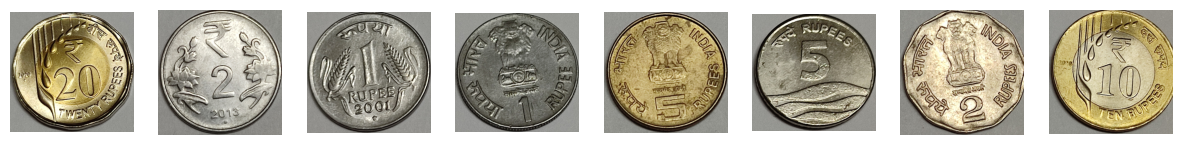

In [15]:
fig, axes = plt.subplots(1, len(segmented_coins), figsize=(15, 5))
for ax, coin in zip(axes, segmented_coins):
    ax.imshow(cv2.cvtColor(coin, cv2.COLOR_BGR2RGB))
    ax.axis("off")
plt.show()